<h1 style="margin-top:25px;margin-bottom: 25px;font-size:3rem;color:#47bb02;text-align:center;">
    Exploratory Data Analysis
</h1>

<h2 style="margin-bottom: 25px;font-size:2.5rem;text-align:center;color:darkblue;">
    Bike Sales Data</h2>


<img src="https://raw.githubusercontent.com/lajmcourses/Images/master/cyclist.jpg"
     style="position:absolute;top:5px;left:25px;height:150px;width:auto;margin-bottom:25px;">
   

**Analysis dataset:** data/bike_sales.csv

https://raw.githubusercontent.com/alv2017/BikeSalesDataAnalysis/master/data/bike_sales.csv

## Assignment

1) First of all we need to understand the data and its content, and the first task is 

    (a) Briefly describe the dataset

    (b) Describe each variable included into the dataset, describe variable's measuring/presentation units.

    (c) Call the solution section "Bike Sales Dataset Specification"
    
    
2) Read the dataset from the csv file and 
    
    (a) Display first 5 rows of the dataset
    
    (b) How many rows the dataset has? How many columns the dataset has?
    
    (c) Print out the datatype of each column. Do we need to correct the data types before analyzing the data?
    
    (d) Display descriptive statistics of numerical variables
    
    (e) Display descriptive statistics of non-numerical variables
    
    
3) Data question:

    (a) What time period the dataset covers?
    
    (b) How many age age groups are in the dataset? What are they?
    
    (c) From what countries customers are coming from? What are those countries?
    
    (d) How many product categories the dataset includes? What are those categories?
    
    
4) Is there any missing data in the bike sales dataset? If yes, then what is it? How it can be fixed? 


5) Sales costs, profit, and revenue:

    - Create plot showing annual costs, profit, and revenue.
    
    - Create plot showing monthly costs, profit, and revenue.


6) Customers by Age Group
    
    - Create plot showing customers by age group.
   
    - Create plot showing sales costs, profit, and revenue by age group.


7) Customers by Gender
    
    - Create plot showing number of customers by gender.
    
    - Create plot showing sales costs, profit, and revenue by gender. 
    

8) Customers by Country
    
    - Create plot showing number of customers by country.
    
    - Create plot showing sales costs, profit, and revenue by coutnry.



## Solution

In [1]:
import datetime as dt
import numpy as np
import pandas as pd

from bokeh.io.export import export_png, get_screenshot_as_png

from bokeh.layouts import column, gridplot
from bokeh.models import BoxAnnotation, ColumnDataSource, FactorRange, Label, PolyAnnotation, Title
from bokeh.models import BoxZoomTool, HoverTool, PanTool, ResetTool, SaveTool, WheelZoomTool
from bokeh.palettes import brewer
from bokeh.plotting import figure, output_notebook, show

from IPython.display import Image, display

# data display options
output_notebook()
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format

# display Bokeh plot as image (Use **False** for interactive Bokeh plot in Jupyter notebook)
DISPLAY_AS_IMAGE = True

Loading BokehJS ...

## 1. Bike Sales Dataset Specification 

### (a) Desctiption of the dataset

The dataset contains products sales data made by online bike store. The store was selling its products
worldwide.

The sales data covers the time period starting from **2011-01-01** and ending with **2016-07-31**.

Each dataset record describes a product sale made on a particular date by a customer. The sales data includes price, cost, profit and revenue information.


### (b) Dataset specification

**Date**: Product purchase date.

**Day**: Day of the month when the product purchase was made.

**Month**: Name of the month when the product purchase was made.

**Year**: Year when the product purchase was made.

**Customer_Age**: Age of the customer. 

**Age_Group**: Customer age group.

**Customer_Gender**: Customer gender. Unit: character/string "M" or "F"

**Country**: Customer country. 

**State**: Customer state.

**Product_Category**: Product category.

**Sub_Category**: Product subcategory.

**Product**: Product name.

**Order_Quantity**: Product quantity.

**Unit_Cost**: Product unit cost, USD.

**Unit_Price**: Product unit price, USD.

**Profit**: Sales profit, USD.

**Cost**: Sales cost, USD.

**Revenue**: Sales revenue, USD.



## 2. Dataset Exploration

In [2]:
# (a) Reading the dataset into Pandas dataframe

df_sales = pd.read_csv("data/bike_sales.csv", sep=",")

df_sales.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
# (b) Shape of data, number of rows, number of columns

shape = df_sales.shape
nrows = shape[0]
ncols = shape[1]

print("Number of rows:", nrows)
print("Number of columns:", ncols)

Number of rows: 113036
Number of columns: 18


In [4]:
# (c) Pandas data types

print(df_sales.dtypes)

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object


**Conclusion:** Unit_Cost, Unit_Price, Profit, Cost, and Revenue could be expressed as floating point variables.

In [5]:
# Let's convert Unit_Cost, Unit_Price, Profit, Cost, and Revenue to floats

df_sales["Unit_Cost"] = df_sales["Unit_Cost"].astype("float")

df_sales["Unit_Price"] = df_sales["Unit_Price"].astype("float")

df_sales["Profit"] = df_sales["Profit"].astype("float")

df_sales["Cost"] = df_sales["Cost"].astype("float")

df_sales["Revenue"] = df_sales["Revenue"].astype("float")

df_sales.dtypes

Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age          int64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity        int64
Unit_Cost           float64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue             float64
dtype: object

In [6]:
# (d) Descriptive Statistics of numerical dataset variables

df_sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00,113036.00
mean,15.67,2014.40,35.92,11.90,267.30,452.94,285.05,469.32,754.37
std,8.78,1.27,11.02,9.56,549.84,922.07,453.89,884.87,1309.09
min,1.00,2011.00,17.00,1.00,1.00,2.00,-30.00,1.00,2.00
25%,8.00,2013.00,28.00,2.00,2.00,5.00,29.00,28.00,63.00
50%,16.00,2014.00,35.00,10.00,9.00,24.00,101.00,108.00,223.00
75%,23.00,2016.00,43.00,20.00,42.00,70.00,358.00,432.00,800.00
max,31.00,2016.00,87.00,32.00,2171.00,3578.00,15096.00,42978.00,58074.00


In [7]:
# (e) Descriptive Statistics for non-numerical dataset variables

df_sales.describe(include=object)

,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036,113036
unique,1884,12,4,2,6,53,3,17,130
top,2016-03-01,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,288,11234,55824,58312,39206,22450,70120,33870,10794


## 3. Answers the Questions

#### (a) What time period the dataset covers?

In [8]:
# Data time period

start_date = min(df_sales["Date"])

end_date = max(df_sales["Date"])

print(f"The dataset covers the time period starting from {start_date} and ending with {end_date}.")

The dataset covers the time period starting from 2011-01-01 and ending with 2016-07-31.


#### (b) How many age groups are used in the dataset? What are those groups?

From the descriptive statistics for the **Age_Group** variable we can see, that there are **4** unique age groups in the dataset.

- Youth (<25) 

- Adults (35-64)

- Young Adults (25-34)

- Seniors (64+)


In [9]:
# Age groups

print(df_sales["Age_Group"].unique())

['Youth (<25)' 'Adults (35-64)' 'Young Adults (25-34)' 'Seniors (64+)']


#### (c) From what countries customers are coming from?

In [10]:
# Countries

print(df_sales["Country"].unique())

['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom']


#### (d) How many product categories the dataset includes? What are those categories?

From the descriptive statistics for the variable **Product_Category** we can conclude, that there are **3** product categories in the dataset.

Those categories are:

- Accessories

- Bikes

- Clothing


In [11]:
# Product Categories

print(df_sales["Product_Category"].unique())

['Accessories' 'Clothing' 'Bikes']


## 4. Missing Data

The bike sales dataset doesn not contain any missing data. It can be seen it by calling the describe() method on the **df_sales** DataFrame: the counts for all the dataset variables are equal to 113036.

## 5. Sales Costs, Profit, and Revenue

### 5.1 Sales Costs, Profit, and Revenue by Year

In [12]:
# Data

year_filter = df_sales["Year"] < 2017
df_sales_revenue = df_sales.loc[year_filter, ["Year", "Cost", "Profit", "Revenue"]].groupby("Year").agg("sum")

# Bokeh CDS
src_sales_revenue = ColumnDataSource(data=df_sales_revenue)
src_sales_revenue.data

# Colors

COLOR = {
    "Cost": "#47bb02",
    "Profit": "#f4dc8c",
    "Revenue":"#ff6c34"
}

df_sales_revenue

,Cost,Profit,Revenue
Year,,,
2011,6083587.00,2881301.00,8964888.00
2012,6223990.00,2951993.00,9175983.00
2013,9280829.00,5959208.00,15240037.00
2014,8288637.00,5864087.00,14152724.00
2015,12495428.00,7528563.00,20023991.00
2016,10677437.00,7035948.00,17713385.00


In [13]:
# Plot 1: Area Chart: Annual Costs, Profit, and Revenue

TOOLTIPS = [
    ("Cost", "$@Cost{0,0.00}"),
    ("Profit", "$@Profit{0,0.00}"),
    ("Revenue", "$@Revenue{0,0.00}")
]

p = figure(width=750, height=500, tools="",
          tooltips=TOOLTIPS
          )
p.title_location = "above"
p.title.text = "\nArea Chart: Annual Cost, Profit, and Revenue\n"
p.title.text_font_size = "25px"
p.title.text_font_style = "normal"

p.line(x="Year", y="Revenue", 
       color=COLOR["Revenue"], 
       line_width=7, alpha=1,
       source=src_sales_revenue,
      )

p.line(x="Year", y="Cost", 
       color=COLOR["Cost"], 
       line_width=7, 
       source=src_sales_revenue)

p.scatter(x="Year", y="Revenue", 
       color="red", 
       size=10, alpha=1,
       source=src_sales_revenue)


p.varea_stack(["Cost", "Profit"], x="Year", 
              color=[COLOR["Cost"], COLOR["Profit"]], 
              alpha=0.7,
              source=src_sales_revenue)

# Bokeh tools
p.add_tools(BoxZoomTool(), PanTool(), WheelZoomTool(), ResetTool(), SaveTool())

# Toolbar
p.toolbar.active_drag = None

# Export image file
img = "plots/annual_revenue.png"
img_file = export_png(p, filename=img)


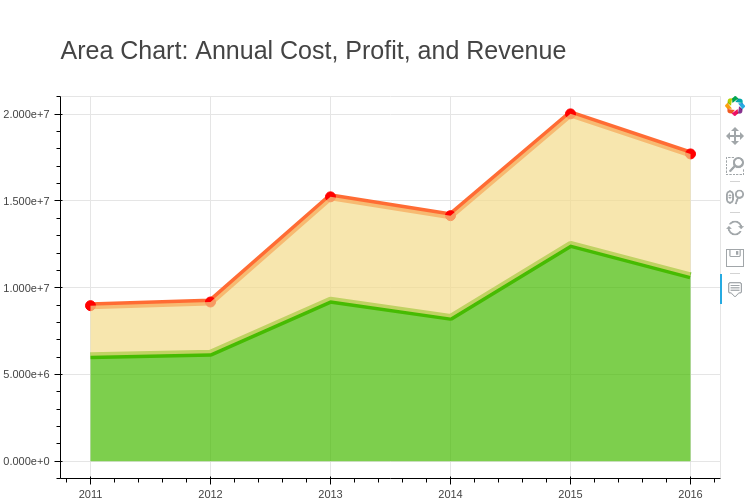

In [14]:
# Display Plot
if DISPLAY_AS_IMAGE:
    display(Image(filename=img))
else:
    show(p)

### 5.2 Line Chart: Sales Costs, Profit, and Revenue by month

In [15]:
# Index

start_date = df_sales["Date"].min()
print("Start date:", start_date)

end_date = df_sales["Date"].max()
print("End date:", end_date)

dti = pd.date_range(start_date, end_date, freq="D")

# Data
## Daily sales
df_sales_daily = df_sales.loc[:, ["Date", "Cost", "Profit", "Revenue"]].groupby("Date").sum()
df_sales_daily.index = pd.DatetimeIndex(df_sales_daily.index)

## Montly sales
df_sales_monthly = df_sales_daily.resample("M").sum()
df_sales_monthly.index = pd.period_range("2011-01", "2016-07", freq="M", name="Month")
df_sales_monthly.head()

Start date: 2011-01-01
End date: 2016-07-31


,Cost,Profit,Revenue
Month,,,
2011-01,462344.00,212849.00,675193.00
2011-02,430454.00,207144.00,637598.00
2011-03,482113.00,226404.00,708517.00
2011-04,475181.00,223601.00,698782.00
2011-05,499848.00,234689.00,734537.00


In [16]:
# Column Data Source
source = ColumnDataSource(data=df_sales_monthly)

# Line Chart: Sales Costs, Profit and Revenue
p = figure(width=900, height=500, 
           tools="",
           x_axis_type="datetime", y_range=(0, 5*pow(10,6)))

# Title
p.title.text = "\nBar Chart: Monthly Cost, Profit, and Revenue\n"
p.title.text_font_size = "25px"
p.title.text_font_style = "normal"
p.title.align = "center"

# Y-axis title
p.add_layout(Title(text="USD", 
                   text_font_size = "16px",
                   text_font_style="normal", align="center"), "left")

# Costs
p.line(x="Month", y="Cost", source=source, 
       line_width=2, color="limegreen", 
       legend_label="Costs")

# Profit
p.line(x="Month", y="Profit", source=source, 
       line_width=2, color="royalblue", 
       legend_label="Profit")

# Revenue
p.line(x="Month", y="Revenue", source=source, 
       line_width=2, color="coral", 
       legend_label="Revenue")

# Legend
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

# Add PolyAnnotation

start_period = pd.Period("2014-08", freq="M")
end_period = pd.Period("2014-12", freq="M")

mid_box = BoxAnnotation(left=start_period, right=end_period, fill_alpha=0.2, fill_color="orange")
p.add_layout(mid_box)

# Add Note

note = Label(x=20, y=3.5*10**6, x_units='screen', y_units='data',
                 text='Note:\nstore was closed from 2014-08 till 2014-12', 
                 render_mode='css',
                 #border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)

p.add_layout(note)

# Bokeh tools
p.add_tools(BoxZoomTool(), PanTool(), WheelZoomTool(), ResetTool(), SaveTool())

# Toolbar
p.toolbar.active_drag = None

# Export image file
img = "plots/monthly_revenue.png"
img_file = export_png(p, filename=img)

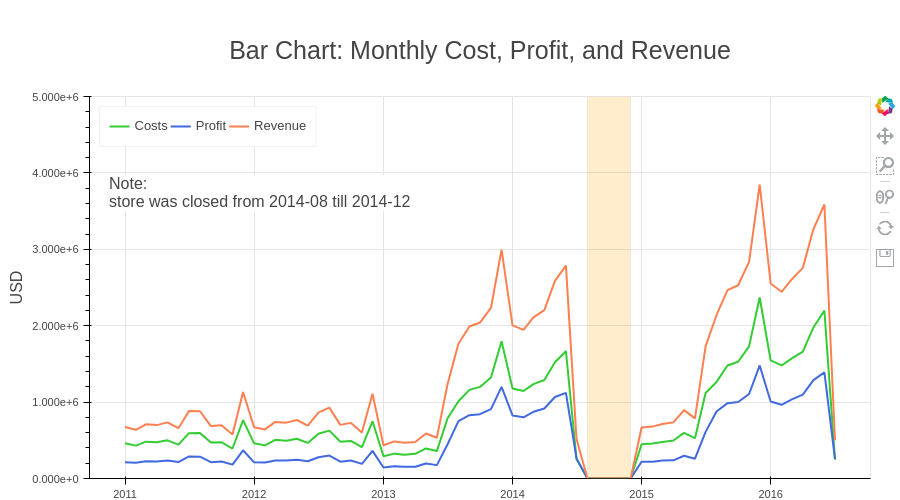

In [17]:
# Display Plot
if DISPLAY_AS_IMAGE:
    display(Image(filename=img))
else:
    show(p)

## 6. Customers by Age Group

In our bike sales dataset we have the following age groups:

- Youth (<25);
- Young Adults(25-34);
- Adults (35-64)
- Seniors (64+)


In [18]:
# Data
age_groups = ["Adults (35-64)", "Young Adults (25-34)", "Youth (<25)", "Seniors (64+)"]
colors = dict(zip(age_groups, ["orange", "skyblue", "limegreen", "slateblue"]))    
categories = [(str(year), age_group) for year in range(2011, 2017) for age_group in age_groups]

sales_by_age_groups = df_sales[["Year", "Age_Group", "Cost", "Profit", "Revenue"]].groupby(
    by = ["Year", "Age_Group"]
)

customers_by_age_group = sales_by_age_groups.agg(
    total = ("Age_Group", "count"),
    cost = ("Cost", "sum"),
    profit = ("Profit", "sum"),
    revenue = ("Revenue", "sum")
)



labels = customers_by_age_group.index.get_level_values(1)
bar_colors = [colors[label] for label in labels]
factors = [(str(year), age_group) for year, age_group in customers_by_age_group.index]


source = ColumnDataSource(data=customers_by_age_group)
source.data["labels"] = labels
source.data["factors"] = factors
source.data["colors"] = bar_colors


In [19]:
# Plot 1: Grouped bar chart: Customers by Age Group by Year

TOOLTIPS1 = [
    ("", "@labels"),
    ("", "@total{0,0.}")
]

p1 = figure(x_range=FactorRange(factors=categories), 
            tooltips=TOOLTIPS1, tools="",
            width=900, height=450)

p1.vbar(x="factors", top="total", width=0.9, color="limegreen", source=source)

p1.title.text = "\nGrouped Bar Chart: Customers by Age Group\n"
p1.title.align = "center"
p1.title.text_font_size = "20px"
p1.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p1.add_layout(Title(text="Number of Customers", 
                   text_font_size = "18px",
                   text_font_style="normal", align="center"), "left")
          
p1.y_range.start = 0
p1.y_range.end = 20000
p1.x_range.range_padding = 0.1

p1.xaxis.major_label_orientation = 1
p1.xgrid.grid_line_color = None

# Bokeh tools
p1.add_tools(PanTool(), WheelZoomTool(), ResetTool(), SaveTool())

# Toolbar
p1.toolbar.active_drag = None


# Plot 2: Grouped bar chart: Profit by Age Group

TOOLTIPS2 = [
    ("", "@labels"),
    ("", "$@profit{0,0.}")
]

p2 = figure(x_range=FactorRange(factors=categories), width=900, height=450, 
            tooltips=TOOLTIPS2, tools="")

p2.vbar(x="factors", top="profit", width=0.9, color="colors", legend_group="labels", source=source)

p2.title.text = "\nGrouped Bar Chart: Profit by Age Group by Year\n"
p2.title.align = "center"
p2.title.text_font_size = "20px"
p2.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p2.add_layout(Title(text="USD", 
                   text_font_size = "18px",
                   text_font_style="normal", align="center"), "left")
          
p2.y_range.start = 0
p2.y_range.end = 5 * 10**6
p2.x_range.range_padding = 0.1

p2.xaxis.major_label_orientation = 1
p2.xgrid.grid_line_color = None

p2.legend.location = "top_left"
p2.legend.orientation = "horizontal"

# Bokeh tools
p2.add_tools(PanTool(), WheelZoomTool(), ResetTool(), SaveTool())

# Toolbar
p2.toolbar.active_drag = None


# Plot 3: Grouped bar chart: Revenue by Age Group

TOOLTIPS = [
    ("Revenue", "$@revenue{0,0.}"),
    ("Profit", "$@profit{0,0.}"),
    ("Cost", "$@cost{0,0.}")
]

p3 = figure(x_range=FactorRange(factors=categories), 
            tooltips=TOOLTIPS, tools="",
            width=900, height=450)

p3.vbar_stack(["cost", "profit"], x="factors", width=0.9, 
              legend_label=["Cost", "Profit"], 
              color=["skyblue", "limegreen"], 
              source=source)

p3.title.text = "\nStacked and Grouped Bar Chart: Cost, Profit, and Revenue by Age Group\n"
p3.title.align = "center"
p3.title.text_font_size = "20px"
p3.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p3.add_layout(Title(text="USD", 
                   text_font_size = "18px",
                   text_font_style="normal", align="center"), "left")
          
p3.y_range.start = 0
p3.y_range.end = 12 * 10**6
p3.x_range.range_padding = 0.1

p3.xaxis.major_label_orientation = 1
p3.xgrid.grid_line_color = None

p3.legend.location = "top_left"
p3.legend.orientation = "horizontal"

# Bokeh tools
p3.add_tools(PanTool(), WheelZoomTool(), ResetTool(), SaveTool())

# Toolbar
p3.toolbar.active_drag = None

# Layout
column_layout = column(p1, p2, p3)

# Export image file
img = "plots/customers_by_age_group.png"
img_file = export_png(column_layout, filename=img)

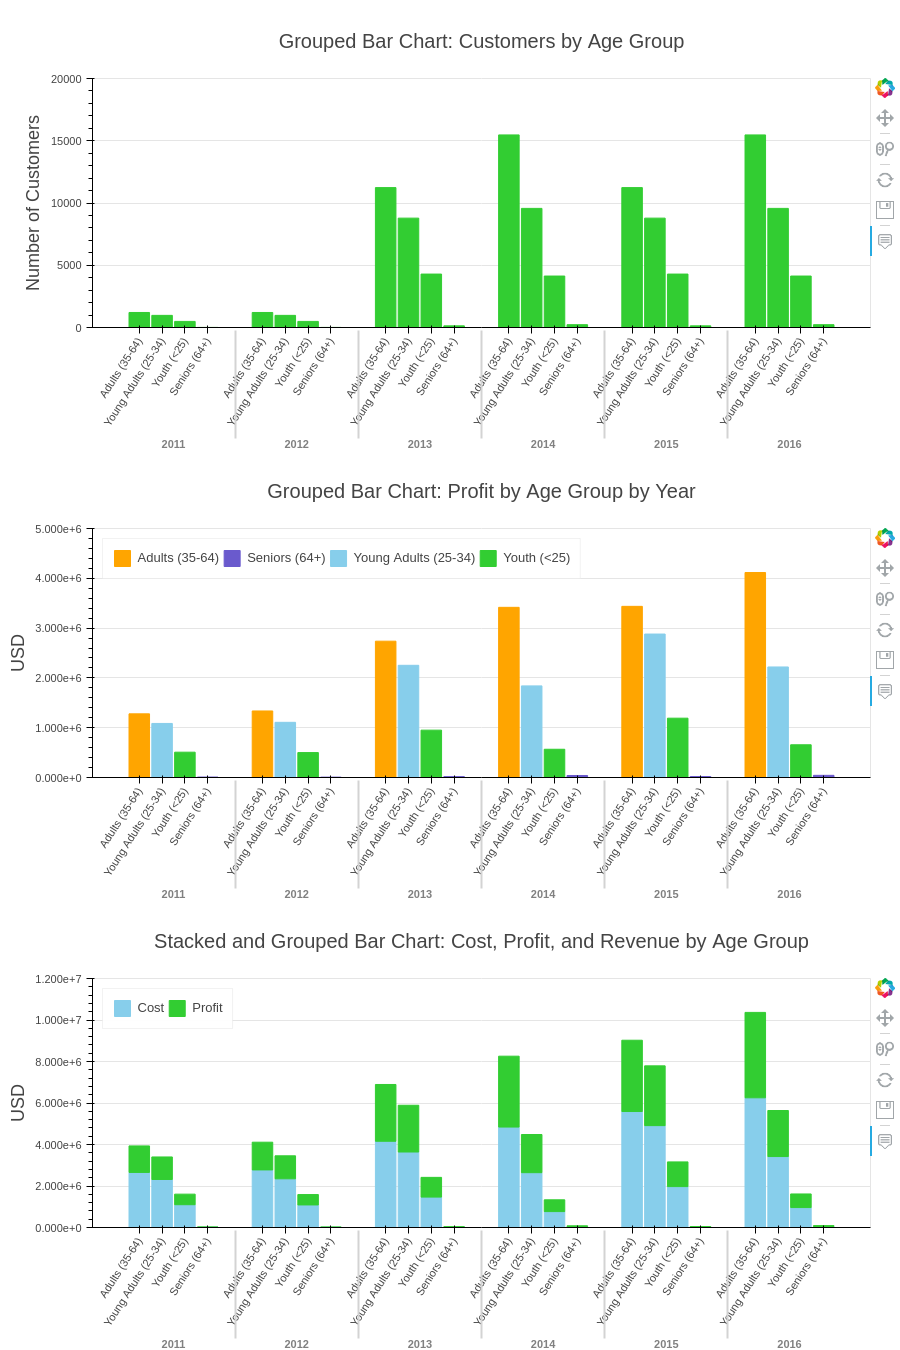

In [20]:
# Display Plot
if DISPLAY_AS_IMAGE:
    display(Image(filename=img))
else:
    show(column_layout)

## 7. Customers by Gender

In [21]:
# Data

colors = ["skyblue", "orange"]
              
# Grouping by Gender
sales_by_gender = \
    df_sales[["Year", "Customer_Gender", "Cost", "Profit", "Revenue"]].groupby(["Year", "Customer_Gender"])
    

revenue_by_gender = sales_by_gender.agg(
    total = ("Customer_Gender", "count"),
    cost = ("Cost", "sum"),
    profit = ("Profit", "sum"),
    revenue = ("Revenue", "sum")
)

                                            
labels = list(revenue_by_gender.index.get_level_values(1))

bar_colors = []

for label in labels:
    if label == "M":
        bar_colors.append(colors[0])
    elif label == "F":
        bar_colors.append(colors[1])
    

factors = [(str(year), gender) for year, gender in revenue_by_gender.index]

source = ColumnDataSource(
    data=revenue_by_gender
)

source.data["factors"] = factors
source.data["labels"] = labels
source.data["colors"] = bar_colors


In [22]:
# Plot 1: Grouped bar chart: Customers by Gender

TOOLTIPS1 = [
    ("", "[@labels]"),
    ("", "@total{0,0.}")
]

p1 = figure(x_range=FactorRange(factors=factors), tooltips=TOOLTIPS1)

p1.vbar(x="factors", top="total", width=0.9, 
       color="limegreen",
       source=source)

p1.title.text = "\nCustomers by Gender\n"
p1.title.align = "center"
p1.title.text_font_size = "16px"
p1.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p1.add_layout(Title(text="Number of Customers", 
                   text_font_size = "14px",
                   text_font_style="normal", align="center"), "left")
          
p1.x_range.range_padding = 0.1

p1.xaxis.major_label_orientation = 0
p1.xgrid.grid_line_color = None


# Plot 2: Grouped bar chart: Profit by Customer Gender

TOOLTIPS2 = [
    ("", "[@labels]"),
    ("Profit", "$@profit")
]

p2 = figure(x_range=FactorRange(factors=factors), tooltips=TOOLTIPS2)

p2.vbar(x="factors", top="profit", width=0.9, 
       legend_group="labels", color="colors",
       source=source)

p2.title.text = "\nProfit by Customer Gender\n"
p2.title.align = "center"
p2.title.text_font_size = "16px"
p2.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p2.add_layout(Title(text="USD", 
                   text_font_size = "14px",
                   text_font_style="normal", align="center"), "left")
          
p2.x_range.range_padding = 0.1

p2.xaxis.major_label_orientation = 0
p2.xgrid.grid_line_color = None

p2.legend.location = "top_left"
p2.legend.orientation = "horizontal"


# Plot 3: Grouped bar chart: Revenue by Age Group by Year

TOOLTIPS3 = [
    ("", "[@labels]"),
    ("Cost", "$@cost"),
    ("Profit", "$@profit"),
    ("Revenue", "$@revenue")
]

p3 = figure(x_range=FactorRange(factors=factors), tooltips=TOOLTIPS3)

p3.vbar_stack(["cost", "profit"], x="factors", width=0.9, 
              legend_label=["Cost", "Profit"], 
              color=["skyblue", "limegreen"], 
              source=source)

p3.title.text = "\nCost, Profit, and Revenue by Gender\n"
p3.title.align = "center"
p3.title.text_font_size = "16px"
p3.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p3.add_layout(Title(text="USD", 
                   text_font_size = "12px",
                   text_font_style="normal", align="center"), "left")
          
p3.x_range.range_padding = 0.1

p3.xaxis.major_label_orientation = 0
p3.xgrid.grid_line_color = None

p3.legend.location = "top_left"
p3.legend.orientation = "horizontal"

# Layout
grid_layout = gridplot([[p2, p1], [p3, None]], width=450, height=350)

# Export image file
img = "plots/customers_by_gender.png"
img_file = export_png(grid_layout, filename=img)


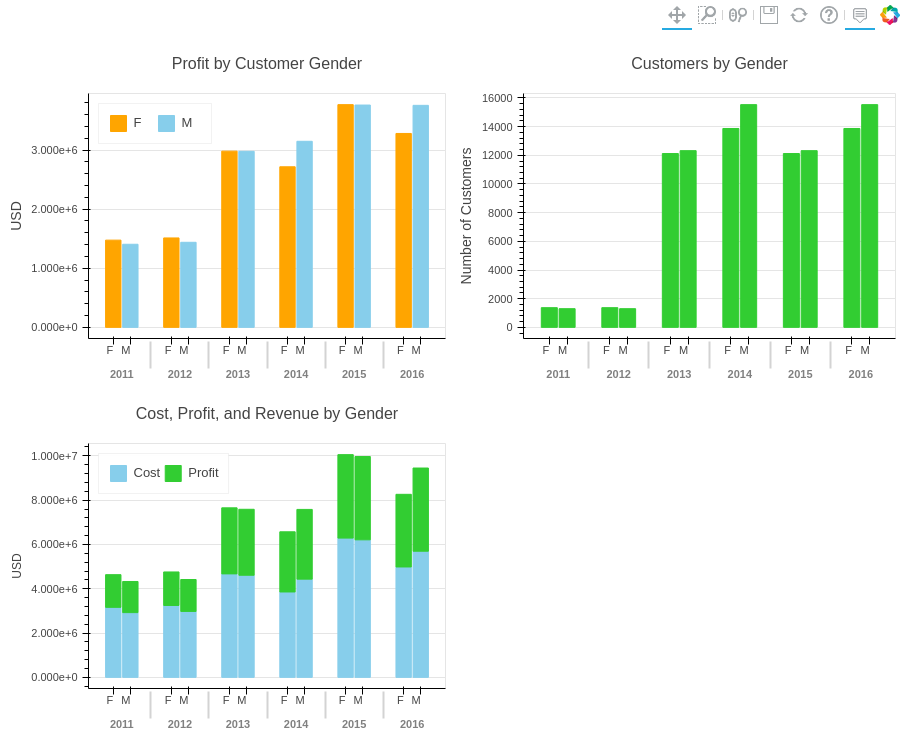

In [23]:
# Display Plot
if DISPLAY_AS_IMAGE:
    display(Image(filename=img))
else:
    show(grid_layout)

## 8. Customers by Country

In [24]:
# Data

countries = ['United States', 'Australia', 'United Kingdom', 'Canada', 'Germany', 'France']
color_palette = dict(zip(countries, brewer["Set2"][6]))

categories = [(str(year), country) for year in range(2011, 2017) for country in countries]
              
# Grouping by Gender
sales_by_country = \
    df_sales[["Year", "Country", "Cost", "Profit", "Revenue"]].groupby(["Year", "Country"])
    

revenue_by_country = sales_by_country.agg(
    total = ("Country", "count"),
    cost = ("Cost", "sum"),
    profit = ("Profit", "sum"),
    revenue = ("Revenue", "sum")
)

                                            
labels = list(revenue_by_country.index.get_level_values(1))
colors = [color_palette[label] for label in labels] 
factors = [(str(year), country) for year, country in revenue_by_country.index]

source = ColumnDataSource(
    data=revenue_by_country
)

source.data["factors"] = factors
source.data["labels"] = labels
source.data["colors"] = colors


In [25]:
# Plot 1: Grouped bar chart: Customers by Country

TOOLTIPS1 = [
    ("", "@labels"),
    ("", "@total{0,0.}")
]

p1 = figure(x_range=FactorRange(factors=categories),
           tooltips=TOOLTIPS1, tools="",
           width=900, height=375)

p1.vbar(x="factors", top="total", width=0.9, color="limegreen", source=source)

p1.title.text = "\nCustomers by Country\n"
p1.title.align = "center"
p1.title.text_font_size = "20px"
p1.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p1.add_layout(Title(text="Number of Customers", 
                   text_font_size = "18px",
                   text_font_style="normal", align="center"), "left")

p1.y_range.start = 0
p1.y_range.end = 12000
p1.x_range.range_padding = 0.1

p1.xaxis.major_label_orientation = 1
p1.xgrid.grid_line_color = None

# Bokeh tools
p1.add_tools(PanTool(), WheelZoomTool(), ResetTool(), SaveTool())

# Toolbar
p1.toolbar.active_drag = None

# Plot 2: Grouped bar chart: Profit by Country


TOOLTIPS2 = [
    ("", "@labels"),
    ("", "$@profit{0,0.00}")
]

p2 = figure(x_range=FactorRange(factors=categories),
           tooltips=TOOLTIPS2, tools="",
           width=900, height=500)

p2.vbar(x="factors", top="profit", width=0.9, 
       legend_group="labels", color="colors",
       source=source)

p2.title.text = "\nProfit by Country\n"
p2.title.align = "center"
p2.title.text_font_size = "20px"
p2.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p2.add_layout(Title(text="USD", 
                   text_font_size = "18px",
                   text_font_style="normal", align="center"), "left")

p2.y_range.start = 0
p2.y_range.end = 3.5*10**6
p2.x_range.range_padding = 0.1

p2.xaxis.major_label_orientation = np.pi/2
p2.xgrid.grid_line_color = None

p2.legend.location = "top_left"
p2.legend.orientation = "horizontal"

# Bokeh tools
p2.add_tools(PanTool(), WheelZoomTool(), ResetTool(), SaveTool())

# Toolbar
p3.toolbar.active_drag = None

# Plot 3: Grouped bar chart: Revenue by Age Group by Year

TOOLTIPS3 = [
    ("", "@labels"),
    ("Cost", "$@cost{0,0.00}"),
    ("Profit", "$@profit{0,0.00}"),
    ("Revenue", "$@revenue{0,0.00}"),
]

p3 = figure(x_range=FactorRange(factors=categories), 
            tooltips=TOOLTIPS3, tools="",
            width=900, height=375)

p3.vbar_stack(["cost", "profit"], x="factors", width=0.9, 
              legend_label=["Cost", "Profit"], 
              color=["skyblue", "limegreen"], 
              source=source)

p3.title.text = "\nCost, Profit, and Revenue by Country\n"
p3.title.align = "center"
p3.title.text_font_size = "20px"
p3.title.text_font_style = "normal"

# add y-axis title with add_layout(...)
p3.add_layout(Title(text="USD", 
                   text_font_size = "18px",
                   text_font_style="normal", align="center"), "left")
          
p3.x_range.range_padding = 0.1
p3.y_range.start = 0
p3.y_range.end = 7*10**6

p3.xaxis.major_label_orientation = 1
p3.xgrid.grid_line_color = None

p3.legend.location = "top_left"
p3.legend.orientation = "horizontal"

# Bokeh tools
p3.add_tools(PanTool(), WheelZoomTool(), ResetTool(), SaveTool())

# Toolbar
p3.toolbar.active_drag = None

# Layout
column_layout = column(p1, p2, p3)

# Export image file
img = "plots/customers_by_country.png"
img_file = export_png(column_layout, filename=img)


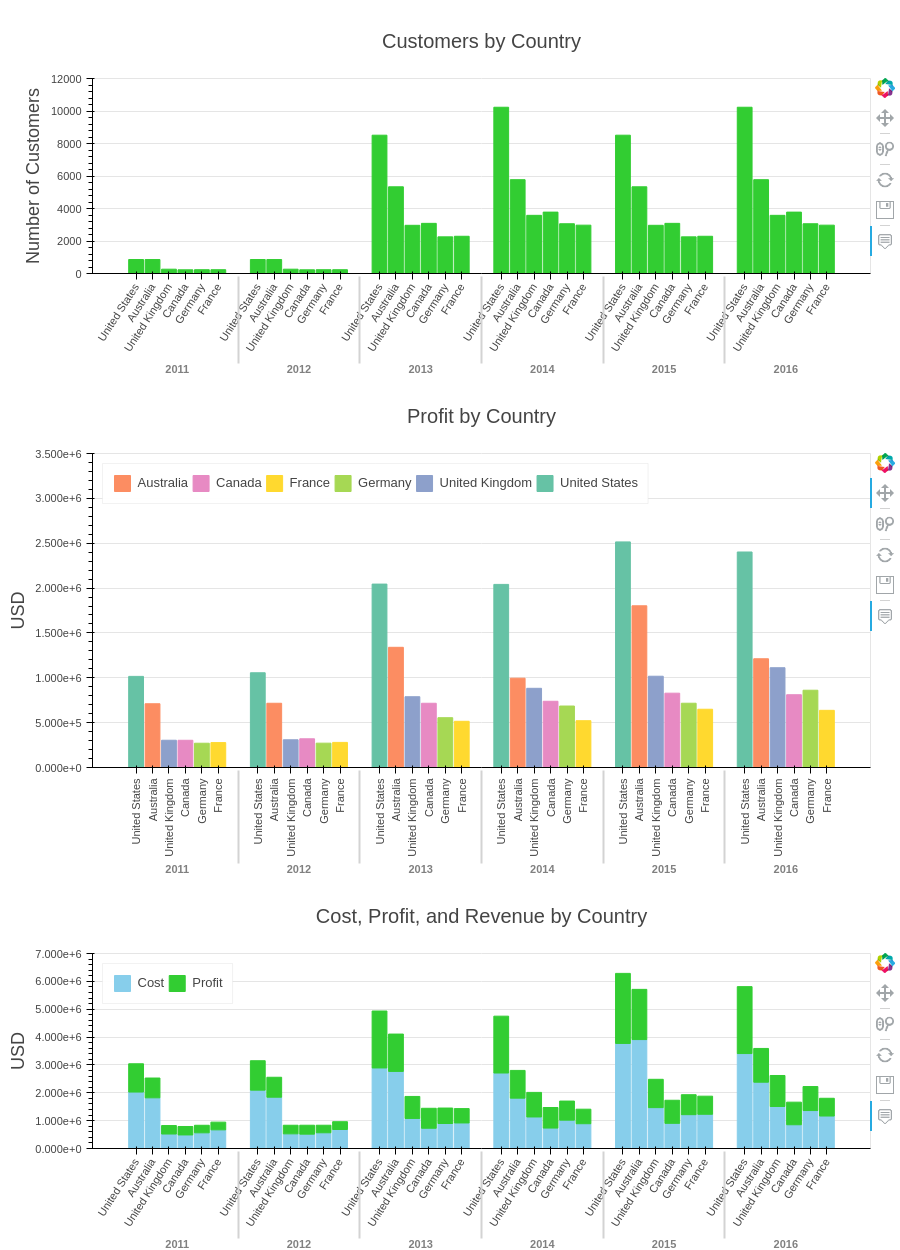

In [26]:
# Display Plot
if DISPLAY_AS_IMAGE:
    display(Image(filename=img))
else:
    show(column_layout)